<a href="https://colab.research.google.com/github/ucfilho/AI/blob/main/AI_2023/Stochastic/class_03_ABCOptmi_grafo_mar_30_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from random import randint

In [2]:
def CalcFit(fun):
    result=0
    if(fun>=0):
      result=1/(fun+1)
    else:
      result=1+fabs(fun)
    return result

In [3]:
Graph ={'A':['B','D'],'B':['C','D'], 'C':['E','G'],'D':['F'],'E':['D','G','F'],'G':['F'],'F':['F']}
Distances={'A':[10,50],'B':[10,20],'C':[10,30],'D':[80],'E':[0,10,50],'G':[10],'F':[0]}
Find = ['A','F']

In [4]:
def grafo_fun(x,f = Find, g=Graph,d=Distances,ans = False):
  names = list(Graph.keys())
  n = len(names)
  get_seq, get_dis =[], 0
  get_seq.append(f[0])
  idx = -1
  for xi in x:
    idx += 1
    N = len(g[get_seq[idx]])
    r = 1/N
    total = 0
    for i in range(N):
      total += r
      if xi <= total:
        k = i
        break
    if get_seq[-1] == f[1]:
      break
    id = get_seq[idx]
    get_seq.append(g[id][k])
    get_dis += d[id][k]
  if get_seq[-1] == f[1]:
    get_dis = get_dis
  else:
    get_dis = 1e99
  if ans == False:
    return get_dis
  else:
    return get_dis, get_seq


In [5]:
function = grafo_fun

In [6]:
def BestSource(GlobMin,GlobPars,Foods):
  FoodNumber=len(Foods[:,0])
  D=len(Foods[0,:])
  solution=np.zeros(D)
  for i in range(FoodNumber):
    if (f[i]<GlobMin):
      GlobMin=f[i]
      for j in range(D):
        GlobPars[j]=Foods[i,j]
  return GlobMin,GlobPars,Foods

In [7]:
def init(index,Foods,trial,f,fitness,MIN,MAX):
  D=len(Foods[0,:])
  FoodNumber=len(Foods[:,0])
  solution=np.zeros(D)
  for j in range(D):
    r=np.random.random()
    Foods[index,j]=r*(MAX[j]-MIN[j])+MIN[j]
    solution[j]=Foods[index,j]
    
  f[index]=function(solution)
  fitness[index]=CalcFit(f[index])
  trial[index]=0
  
  return Foods,trial,f,fitness

In [8]:
def initial(fitness,trial,f,Foods,GlobMin,GlobPars,MIN,MAX):
  D=len(Foods[0,:])
  FoodNumber=len(Foods[:,0])
  for i in range(FoodNumber):
    Foods,trial,f,fitness=init(i,Foods,trial,f,fitness,MIN,MAX) 
  GlobMin=f[0]
  for i in range(D):
    GlobPars[i]=Foods[0,i]
  return  f,Foods,GlobMin,GlobPars


In [9]:
def EmployedBees(trial,Foods,MIN,MAX):
  FoodNumber=len(Foods[:,0])
  NP=FoodNumber
  D=len(Foods[0,:])
  solution=np.zeros(D)
  for i in range(FoodNumber):
    r = np.random.random()
    par2chan= int(r*D)
    r = np.random.random()
    neighbour=int(r*D)
    if(neighbour >= NP):
      neighbour=NP-1
      
    while(neighbour==i):
      r = np.random.random()
      neighbour=int(r*FoodNumber)
      if(neighbour >= NP):
        neighbour=NP-1
    for j in range(D):
      solution[j]=Foods[i,j]

    r = np.random.random()
    A=Foods[i,par2chan]
    B=Foods[neighbour,par2chan]
    solution[par2chan]=Foods[i,par2chan]+(A-B)*(r-0.5)*2;
    if (solution[par2chan]<MIN[par2chan]):
      solution[par2chan]=MIN[par2chan]
    if (solution[par2chan]>MAX[par2chan]):
      solution[par2chan]=MAX[par2chan]
    ObjValSol=function(solution)
    FitnessSol=CalcFit(ObjValSol)
    
    if(FitnessSol>fitness[i]):
      trial[i]=0
      for j in range(D):
        Foods[i,j]=solution[j]
      f[i]=ObjValSol
      fitness[i]=FitnessSol
    else:
      trial[i]=trial[i]+1 
      
  return trial,Foods

In [10]:
def CalcProb(fitness,prob):
  FoodNumber=len(fitness)
  maxfit=fitness[0]
  for i in range(1,FoodNumber):    
    if (fitness[i]>maxfit):
      maxfit=fitness[i]
  for i in range(FoodNumber):
    prob[i]=(0.9*(fitness[i]/maxfit))+0.1
  return fitness,prob


In [11]:
def OnlookerBees(trial,Foods,MIN,MAX):
  D=len(Foods[0,:])
  solution=np.zeros(D)
  FoodNumber=len(Foods[:,0])
  i=0
  t=0
  while(t<FoodNumber):
    r = np.random.random()
    if(r<prob[i]): 
      r = np.random.random()
      t=t+1
      par2chan=int(r*D)
      r = np.random.random()
      neighbour=int(r*FoodNumber)

      while(neighbour==i):
        r = np.random.random()
        neighbour=int(r*FoodNumber)
      for j in range(D):
        solution[j]=Foods[i,j]

      r = np.random.random()
      A=Foods[i,par2chan]
      B=Foods[neighbour,par2chan]
      solution[par2chan]=A+(A-B)*(r-0.5)*2

      if (solution[par2chan]<MIN[par2chan]):
              solution[par2chan]=MIN[par2chan]
      if (solution[par2chan]>MAX[par2chan]):
              solution[par2chan]=MAX[par2chan]
      ObjValSol=function(solution)
      FitnessSol=CalcFit(ObjValSol)
              
      if(FitnessSol>fitness[i]):
        trial[i]=0
        for j in range(D):
          Foods[i,j]=solution[j]
        f[i]=ObjValSol
        fitness[i]=FitnessSol
      else:
        trial[i]=trial[i]+1
      i=i+1
      if (i==FoodNumber):
        i=0
  return trial,Foods


In [12]:
def ScoutBees(fitness,f,Foods,trial,MIN,MAX):
  FoodNumber=len(Foods[:,0])
  max_trial=0
  for i in range(1,FoodNumber):
    if (trial[i]>trial[max_trial]):
      max_trial=i
  if(trial[max_trial]>=limit):
    Foods,trial,f,fitness=init(max_trial,Foods,trial,f,fitness,MIN,MAX)
  return trial,Foods


In [13]:
'''/*Main program of the ABC algorithm*/'''

NPAR=175 #Numero de fontes de comida
ITE=300 #ITERACOES (maxCycle)
PAR=10 #NUM DE PARAMETROS A SER OTIMIZADOS
MAX=[1]*PAR # MAXIMO DE CADA PARAMETRO
MIN=[0]*PAR # MINIMO DE CADA PARAMETRO

limit=100 # quantas vezes obtem resposta identica antes de encerrar 
runtime=4 # quantas vezes vai rodar para tirar a media

f=np.zeros(NPAR) 
Foods=np.zeros((NPAR,PAR)) 
solution=np.zeros(PAR)
fitness=np.zeros(NPAR)
trial=np.zeros(NPAR)
prob=np.zeros(NPAR)
GlobPars=np.zeros(PAR)
GlobMins=np.zeros(runtime)
GlobMin=1e99

for run in range(runtime):
  f,Foods,GlobMin,GlobPars= initial(fitness,trial,f,Foods,GlobMin,GlobPars,MIN,MAX)
  GlobMin,GlobPars,Foods=BestSource(GlobMin,GlobPars,Foods)

  for iter in range(ITE):
    trial,Foods=EmployedBees(trial,Foods,MIN,MAX)
    fitness,prob=CalcProb(fitness,prob)
    trial,Foods=OnlookerBees(trial,Foods,MIN,MAX)
    GlobMin,GlobPars,Foods=BestSource(GlobMin,GlobPars,Foods)
    trial,Foods=ScoutBees(fitness,f,Foods,trial,MIN,MAX)


  print("GlobalParam", GlobPars)
    
  print("run",run+1,"GBest=",GlobMin," \n");
  GlobMins[run]=GlobMin

mean=np.average(GlobMins)


print("Means of",runtime,"runs:",mean,"\n")

GlobalParam [0.34940735 0.02451803 0.03839077 0.59868398 0.40171514 0.76316371
 0.25987488 0.99315191 0.45053378 0.86732099]
run 1 GBest= 50.0  

GlobalParam [0.09035155 0.07045106 0.43505539 0.42685889 0.51502413 0.53219616
 0.10382354 0.15236055 0.1694703  0.60509551]
run 2 GBest= 50.0  

GlobalParam [0.38289141 0.28983808 0.29198339 0.64247014 0.03702833 0.03108136
 0.71201645 0.19302543 0.11717764 0.55811192]
run 3 GBest= 50.0  

GlobalParam [0.37505981 0.28629363 0.16459232 0.33413026 0.45049498 0.30147675
 0.50690755 0.10178294 0.63035335 0.33291661]
run 4 GBest= 50.0  

Means of 4 runs: 50.0 



In [14]:
print(grafo_fun(GlobPars))
print(grafo_fun(GlobPars,ans=True))

50
(50, ['A', 'B', 'C', 'E', 'G', 'F'])


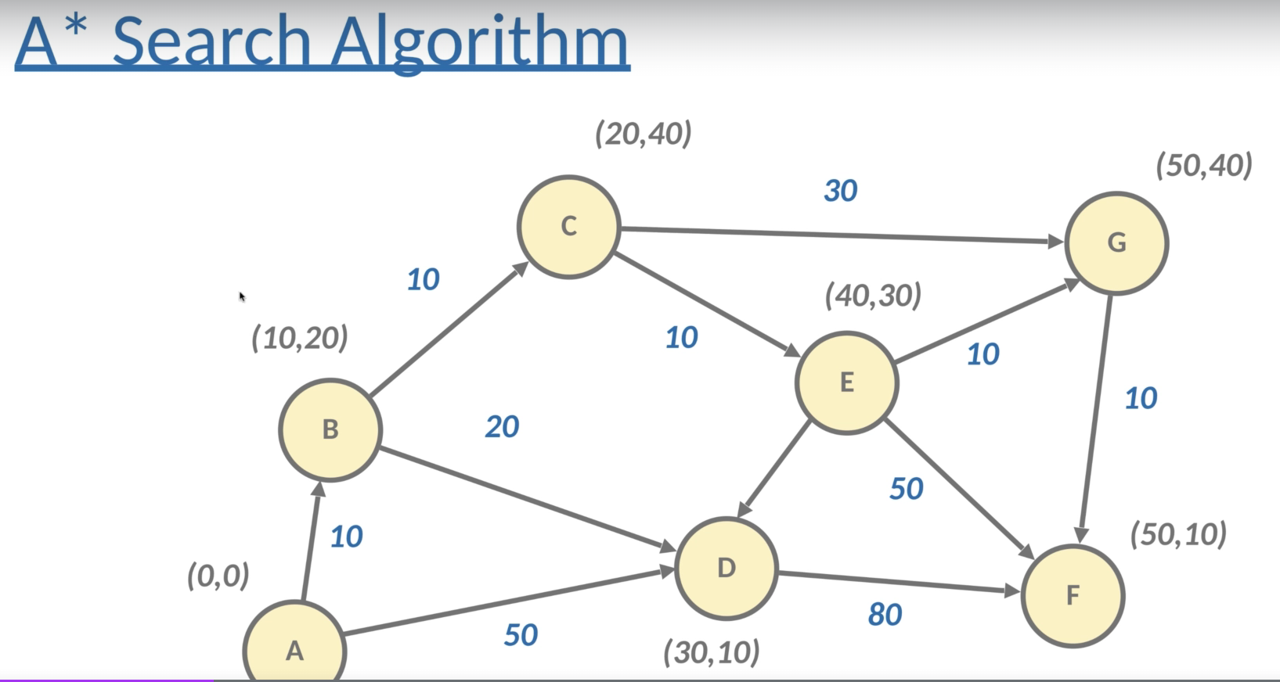